In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from scipy import interpolate


u freestream=  0.9999993036707951

dref=  1.2167803858387822

disp thick= 1.2167860220048128

H= 2.591143960815574


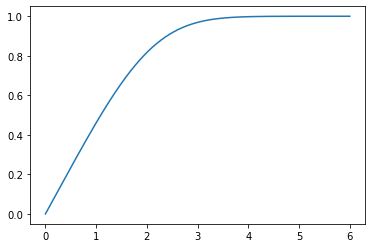

In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

def blas(eta,f): # define the Blasius equation
    blas=(f[1],f[2],-f[0]*f[2])
    return blas

f0=(0.0,0.0,0.4696) # wall condition (adjust f0(2) until u=1 in freestream)
etamax=6.0 # how far to integrate out to
nplot=501 # need to be quite large for accurate trapezoid integration later
outrange=np.zeros(nplot)
for i in range(nplot):
    outrange[i]=i*etamax/(nplot-1) # should be a quicker way of doing this

# shoot out from wall to freestream (NB tolerances reduced below default values)
p=integrate.solve_ivp(blas,[0,etamax],f0,t_eval=outrange,rtol=1.e-8,atol=1.e-10)

eta=p.t
u=p.y[1,:]
print('\nu freestream= ',u[-1])
dref=eta[-1]-p.y[0,-1]
print('\ndref= ',dref)
plt.plot(eta,u) # velocity profile

dstar=np.trapz(1.0-u,eta) # displacement thickness
theta=np.trapz(u*(1.0-u),eta) # momentum thickness
H=dstar/theta # shape factor
print ('\ndisp thick=',dstar)
print('\nH=',H)

### task 2a)

In [80]:
L = 0.5  # Length of domain in x direction
h = 0.001*11  # Height of domain in y direction
Nx = 5000 # Number of grid points in x direction carried out for Nx = 500, 1000, 2000, 3000, 4000, 5000
Ny = 500  # Number of grid points in y direction carried out for Ny = 50, 100, 200, 300, 400, 500
dx = L/Nx  # Grid spacing in x direction
dy = h/Ny  # Grid spacing in y direction
ue = 10  # Free-stream velocity
nu = 1.45e-5  # Kinematic viscosity
Re = 1/nu  # Reynolds number

# Initialize solution arrays
u = np.zeros(Ny)  # Velocity in x direction
v = np.zeros(Ny)  # Velocity in y direction
x = np.linspace(0, L, Nx)  # Grid points in x direction
y = np.linspace(0, h, Ny)  # Grid points in y direction
# Set initial conditions
for i in range(1,Ny-1):
    u[i] = ue  # Velocity at the top boundary
    v[i] = 0  # Velocity at the left boundary

# Define the tridiagonal matrix
a = np.zeros(Ny)
b = np.zeros(Ny)
c = np.zeros(Ny)
d = np.zeros(Ny)

#initializing top and bottom corner of the trigonal matrix
b[0] = 1
c[0] = 0
d[0] = 0
a[Ny-1] = 0
b[Ny-1] = 1
d[Ny-1] = ue

up = np.zeros(Ny)
displacement_thickness = np.zeros(Nx)
momentum_thickness = np.zeros(Nx)

In [81]:
for i in range(0,Nx):
    v[0] = 0
    for j in range(1, Ny-1):
        a[j] = - v[j]/2 *dx/dy - dx/(Re * dy**2)
        b[j] = u[j] + 2*dx/(Re * dy**2)
        c[j] = v[j]/2 *dx/dy - dx/(Re * dy**2)
        d[j] = u[j]**2
        #up[j] = u[j]
    for j in range(0,Ny-2):
        fac = a[j+1]/b[j]
        b[j+1] = b[j+1] - fac*c[j]
        d[j+1] = d[j+1] - fac*d[j]
    
    u[Ny-1] = d[Ny-1]/b[Ny-1]
    
    for j in range(Ny-2,-1,-1): 
        u[j] = (d[j]-c[j]*u[j+1])/b[j]
    
    for j in range(1,Ny):
        v[j] = v[j-1] - dy/(2*dx)*((u[j]-up[j]+u[j-1]-up[j-1]))
    
    displacement_thickness[i] = np.trapz(1-u/ue,y)
    momentum_thickness[i] = np.trapz(u/ue*(1-u/ue),y)
    #integrand = 1 - u/ue 
    #integral = integrate.quad(integrand, y[0],y[Ny-1])
    #displacement_thickness[i] = integral
    #integrand = u/ue*(1-u/ue) 
    #integral = integrate.quad(integrand, y[0],y[Ny-1])
    #momentum_thickness[i] = integral
    for j in range(Ny):
        up[j] = u[j]
#print('a=',a)
#print('b=',b)
#print('c=',c)
#print('d=',d)
#print('u=',u)

H =  [3.66896552 4.7916948  3.15345043 ... 2.59100353 2.59100355 2.59100357]


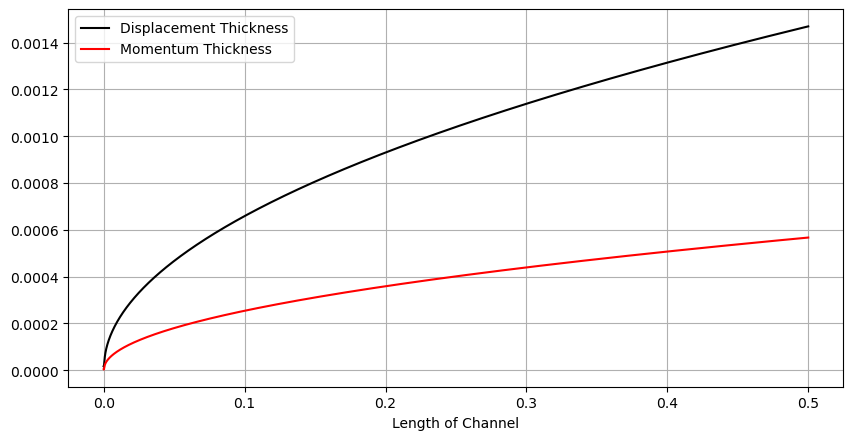

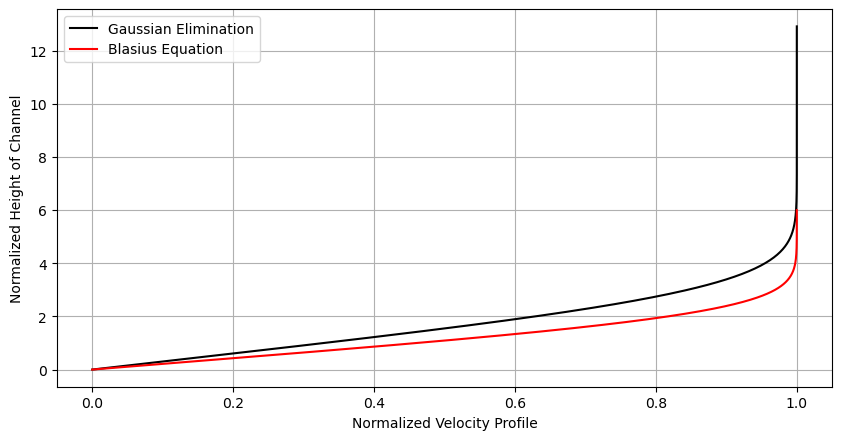

In [82]:
H = displacement_thickness/momentum_thickness
print('H = ',H)
etap=y*np.sqrt(ue/(nu*0.5));
z=u/ue;
def blas(eta,f): # define the Blasius equation
    blas=(f[1],f[2],-f[0]*f[2])
    return blas

f0=(0.0,0.0,0.4696) # wall condition (adjust f0(2) until u=1 in freestream)
etamax=6.0 # how far to integrate out to
nplot=501 # need to be quite large for accurate trapezoid integration later
outrange=np.zeros(nplot)
for i in range(nplot):
    outrange[i]=i*etamax/(nplot-1) # should be a quicker way of doing this

# shoot out from wall to freestream (NB tolerances reduced below default values)
p=integrate.solve_ivp(blas,[0,etamax],f0,t_eval=outrange,rtol=1.e-8,atol=1.e-10)

eta=p.t
u1=p.y[1,:]
dref=eta[-1]-p.y[0,-1]

from matplotlib.pyplot import figure
figure(figsize=(10, 5), dpi=100)
plt.plot(x,displacement_thickness,'k',label='Displacement Thickness')
plt.plot(x,momentum_thickness,'r',label='Momentum Thickness')
plt.xlabel('Length of Channel')
plt.legend()
plt.grid()
plt.show()
from matplotlib.pyplot import figure
figure(figsize=(10, 5), dpi=100)
plt.plot(z,etap,'k',label='Gaussian Elimination')
plt.plot(u1,eta,'r',label='Blasius Equation')
plt.xlabel('Normalized Velocity Profile')
plt.ylabel('Normalized Height of Channel')
plt.legend()
plt.grid()
plt.show()

### task 2b)

In [90]:
import numpy as np
from scipy import integrate
from scipy import interpolate
import matplotlib.pyplot as plt

def cheb_matrix(n):
    y=np.zeros(n)
    nm=n-1
    for i in range(n):
        y[i]=np.cos(np.pi*i/nm)              
    d=np.zeros((n,n))
    d[0,0]=(1.0+2.0*nm*nm)/6.0;
    d[0,-1]=(-1.0)**nm/(y[0]-y[-1]);
    d[-1,0]=(-1.0)**nm/(y[-1]-y[0]);
    d[-1,-1]=-(1.0+2.0*nm*nm)/6.0;
    for i in range(1,nm):
        d[i,0]=(-1.0)**i/(2.0*(y[i]-y[0]));
        d[i,-1]=(-1.0)**(i+nm)/(2.0*(y[i]-y[-1]))
    for j in range(1,nm):
        d[0,j]=(-1.0)**j*2.0/(y[0]-y[j])
        d[-1,j]=(-1.0)**(j+nm)*2.0/(y[-1]-y[j])
    for i in range(1,nm):
        for j in range(1,nm):
            if i==j:
                d[i,i]=-y[i]/(2.0*(1.0-y[i]**2))
            else:
                d[i,j]=(-1.0)**(i+j)/(y[i]-y[j])
    return y,d
iw = []
# Initialise
for i in range(2,200):
    n=i
    eta,d1p=cheb_matrix(n)
    d2p=np.matmul(d1p,d1p)
    d3p=np.matmul(d2p,d1p)
    d4p=np.matmul(d2p,d2p)
    L=30 # mapping parqameter
    eta[0]=1.0-1.0e-6
    y=L*(1.0+eta)/(1.0-eta)
    #print(y)
    eta1=(-((y-L)/(L+y)**2)+1.0/(L+y))
    eta2=(2.0*(y-L)/(L+y)**3-2.0/(L+y)**2)
    eta3=(-6.0*(y-L)/(L+y)**4+6.0/(L+y)**3)
    eta4=(24.0*(y-L)/(L+y)**5-24.0/(L+y)**4)

    d1=np.zeros((n,n))
    d2=np.zeros((n,n))
    d3=np.zeros((n,n))
    d4=np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            d4[i,j]=eta1[i]**4*d4p[i,j]+6.0*eta1[i]**2*eta2[i]*d3p[i,j]+(3.0*eta2[i]**2+4.0*eta1[i]*eta3[i])*d2p[i,j]+eta4[i]*d1p[i,j]
            d3[i,j]=eta1[i]**3*d3p[i,j]+3.0*eta1[i]*eta2[i]*d2p[i,j]+eta3[i]*d1p[i,j]
            d2[i,j]=eta1[i]**2*d2p[i,j]+eta2[i]*d1p[i,j]
            d1[i,j]=eta1[i]*d1p[i,j]  
    #
    # Set the velocity profile for Blasius flow
    def blas(eta,f): # define the Blasius equation
        blas=(f[1],f[2],-f[0]*f[2])
        return blas

    f0=(0.0,0.0,0.4696) # wall condition (adjust f0(2) until u=1 in freestream)
    etamax=6.0 # how far to integrate out to
    nplot=101 
    outrange=np.zeros(nplot)
    for i in range(nplot):
        outrange[i]=i*etamax/(nplot-1) # should be a quicker way of doing this

    # shoot out from wall to freestream (NB tolerances reduced below default values)
    p=integrate.solve_ivp(blas,[0,etamax],f0,t_eval=outrange,rtol=1.e-6,atol=1.e-8)

    etab=p.t
    ub=p.y[1,:]
    #print('\nu freestream= ',ub[-1])
    dref=etab[-1]-p.y[0,-1]
    #print('\n dref= ',dref)
    #plt.plot(etab,ub) # velocity profile

    # spline fit from ub, etab/dref to u,y
    tck=interpolate.splrep(etab/dref,ub,s=0)
    ymax=etamax/dref
    u=np.zeros(n)
    for i in range(n):
        if y[i] < ymax:
            u[i]=interpolate.splev(y[i],tck,der=0)
        else:
            u[i]=1.0

    #print(y)
    #print(u)
    #plt.plot(y,u)
    #plt.xlim([0, 5])
    #plt.ylim([0,1.05])

    #d1u=np.matmul(d1,u)
    d2u=np.matmul(d2,u)

    #
    # set flow parameters
    re=1500
    alpha=0.2

    A=np.zeros((n,n),dtype=complex)
    B=np.zeros((n,n),dtype=complex)
    for i in range(n):
        for j in range(n):
            A[i,j]=(u[i]-2.0j*alpha/re)*d2[i,j]+1.0j/(re*alpha)*d4[i,j]
            B[i,j]=d2[i,j]
            if i==j:
                A[i,j]=A[i,j]+1.0j*alpha**3/re-u[i]*alpha**2-d2u[i]
                B[i,j]=B[i,j]-alpha**2

    # now the boundary condition
    for j in range(n):
        A[0,j]=0.0
        A[1,j]=0.0
        A[n-2,j]=0.0
        A[n-1,j]=0.0
        B[0,j]=0.0
        B[1,j]=d1[-1,j]
        B[-2,j]=d1[0,j]
        B[-1,j]=0.0
    B[0,0]=1.0
    B[n-1,n-1]=1.0

    Binv=np.linalg.inv(B)
    eigvals,eigvects=np.linalg.eig(np.matmul(Binv,A))

    # alternative from scip, but no eigenvectors
    #from scipy import linalg
    #eigvals=linalg.eigvals(A,B)
    #print('\neigenvalues= ',eigvals)

    # find largest eigenvalue for 0.01<c_ph<0.99
    eval=np.complex(0.0,-1.e10)
    for i in range(n):
        if np.real(eigvals[i]) > 0.01:
            if np.real(eigvals[i]) < 0.99:
                if np.imag(eigvals[i])>np.imag(eval):
                    eval=eigvals[i]
    #print('\nLargest eigenvalue= ',eval*alpha)  # Gaster test case: 0.06312288+i0.00315665
    w=eval*alpha
    iw.append(w.imag)
    print('nchef = ',n,'omega = ',w)

C:\Users\Mac Pro\AppData\Local\Temp\ipykernel_11640\4151930726.py:136: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eval=np.complex(0.0,-1.e10)


nchef =  2 omega =  -2000000000j
nchef =  3 omega =  -2000000000j
nchef =  4 omega =  -2000000000j
nchef =  5 omega =  -2000000000j
nchef =  6 omega =  -2000000000j
nchef =  7 omega =  (0.19785970661151672-2.847233896563444e-05j)
nchef =  8 omega =  (0.19699911291543237-3.229178022728794e-05j)
nchef =  9 omega =  (0.18492825314445432-5.702443334076918e-05j)
nchef =  10 omega =  (0.15652752355041497-9.10677103077446e-05j)
nchef =  11 omega =  (0.19788714335366245-4.408847813114941e-05j)
nchef =  12 omega =  (0.19619772633514315-5.956985539691401e-05j)
nchef =  13 omega =  (0.19564150883452663-8.258431145853506e-05j)
nchef =  14 omega =  (0.19622022932696165-0.0001085679513939826j)
nchef =  15 omega =  (0.18503828122747512-0.0003004554546851124j)
nchef =  16 omega =  (0.16837295703924313-0.000390401611049229j)
nchef =  17 omega =  (0.15087012132035504-0.00046864501062948466j)
nchef =  18 omega =  (0.19793125946416754-0.00020908573059165238j)
nchef =  19 omega =  (0.19777400517141683-0.00

nchef =  130 omega =  (0.06312291898505082+0.0031566487211723347j)
nchef =  131 omega =  (0.06312291790173984+0.0031566425598293733j)
nchef =  132 omega =  (0.06312292295104129+0.003156647630594953j)
nchef =  133 omega =  (0.06312292363552656+0.0031566457635616735j)
nchef =  134 omega =  (0.06312292469093489+0.0031566448855973616j)
nchef =  135 omega =  (0.06312292727627347+0.0031566457098554735j)
nchef =  136 omega =  (0.06312292467137635+0.003156638711845906j)
nchef =  137 omega =  (0.06312292796986022+0.003156632102787979j)
nchef =  138 omega =  (0.06312292892627958+0.003156621605823114j)
nchef =  139 omega =  (0.06312292958256463+0.003156612558028354j)
nchef =  140 omega =  (0.06312293282774115+0.0031566176827753627j)
nchef =  141 omega =  (0.0631229298536507+0.003156622280299449j)
nchef =  142 omega =  (0.06312292730288978+0.003156629835801821j)
nchef =  143 omega =  (0.06312292464054807+0.003156644053293655j)
nchef =  144 omega =  (0.06312291851357098+0.0031566477132077505j)
nche

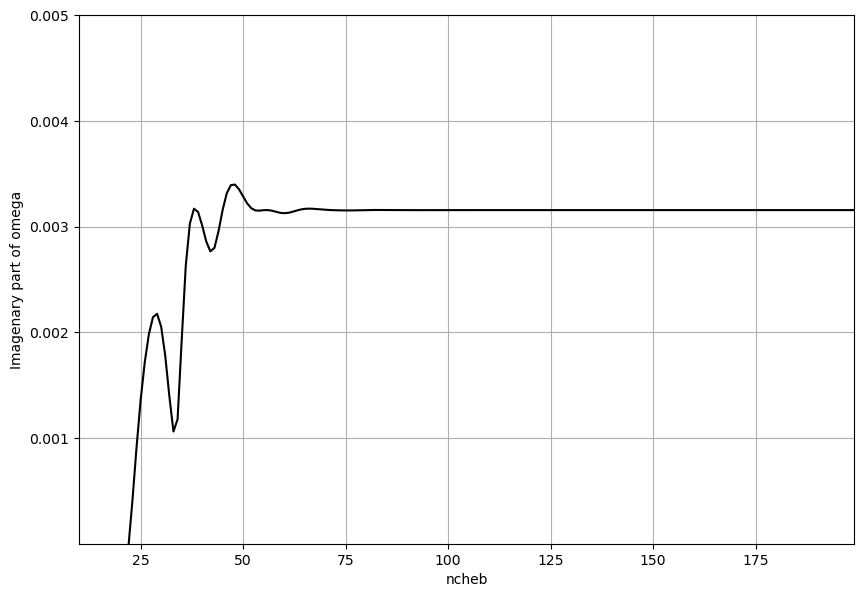

In [95]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7), dpi=100)
ncheb = np.linspace(2,199,198)
plt.plot(ncheb,iw,'k')
plt.xlabel('ncheb')
plt.xlim([10,199])
plt.ylim([0.000001,0.005])
plt.ylabel('Imagenary part of omega')
plt.grid()
plt.show()

nchef =  80 omega =  0.06312487701592871+0.003156642419293478j



Gaster test case: 0.06312288+i0.00315665

In [97]:
import numpy as np
from scipy import integrate
from scipy import interpolate
import matplotlib.pyplot as plt

def cheb_matrix(n):
    y=np.zeros(n)
    nm=n-1
    for i in range(n):
        y[i]=np.cos(np.pi*i/nm)              
    d=np.zeros((n,n))
    d[0,0]=(1.0+2.0*nm*nm)/6.0;
    d[0,-1]=(-1.0)**nm/(y[0]-y[-1]);
    d[-1,0]=(-1.0)**nm/(y[-1]-y[0]);
    d[-1,-1]=-(1.0+2.0*nm*nm)/6.0;
    for i in range(1,nm):
        d[i,0]=(-1.0)**i/(2.0*(y[i]-y[0]));
        d[i,-1]=(-1.0)**(i+nm)/(2.0*(y[i]-y[-1]))
    for j in range(1,nm):
        d[0,j]=(-1.0)**j*2.0/(y[0]-y[j])
        d[-1,j]=(-1.0)**(j+nm)*2.0/(y[-1]-y[j])
    for i in range(1,nm):
        for j in range(1,nm):
            if i==j:
                d[i,i]=-y[i]/(2.0*(1.0-y[i]**2))
            else:
                d[i,j]=(-1.0)**(i+j)/(y[i]-y[j])
    return y,d
#
# Initialise 
n=80
eta,d1p=cheb_matrix(n)
d2p=np.matmul(d1p,d1p)
d3p=np.matmul(d2p,d1p)
d4p=np.matmul(d2p,d2p)
L=30 # mapping parqameter
eta[0]=1.0-1.0e-6
y=L*(1.0+eta)/(1.0-eta)
#print(y)
eta1=(-((y-L)/(L+y)**2)+1.0/(L+y))
eta2=(2.0*(y-L)/(L+y)**3-2.0/(L+y)**2)
eta3=(-6.0*(y-L)/(L+y)**4+6.0/(L+y)**3)
eta4=(24.0*(y-L)/(L+y)**5-24.0/(L+y)**4)

d1=np.zeros((n,n))
d2=np.zeros((n,n))
d3=np.zeros((n,n))
d4=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        d4[i,j]=eta1[i]**4*d4p[i,j]+6.0*eta1[i]**2*eta2[i]*d3p[i,j]+(3.0*eta2[i]**2+4.0*eta1[i]*eta3[i])*d2p[i,j]+eta4[i]*d1p[i,j]
        d3[i,j]=eta1[i]**3*d3p[i,j]+3.0*eta1[i]*eta2[i]*d2p[i,j]+eta3[i]*d1p[i,j]
        d2[i,j]=eta1[i]**2*d2p[i,j]+eta2[i]*d1p[i,j]
        d1[i,j]=eta1[i]*d1p[i,j]  
#
# Set the velocity profile for Blasius flow
def blas(eta,f): # define the Blasius equation
    blas=(f[1],f[2],-f[0]*f[2])
    return blas

f0=(0.0,0.0,0.4696) # wall condition (adjust f0(2) until u=1 in freestream)
etamax=6.0 # how far to integrate out to
nplot=101 
outrange=np.zeros(nplot)
for i in range(nplot):
    outrange[i]=i*etamax/(nplot-1) # should be a quicker way of doing this

# shoot out from wall to freestream (NB tolerances reduced below default values)
p=integrate.solve_ivp(blas,[0,etamax],f0,t_eval=outrange,rtol=1.e-6,atol=1.e-8)

etab=p.t
ub=p.y[1,:]
#print('\nu freestream= ',ub[-1])
dref=etab[-1]-p.y[0,-1]
#print('\n dref= ',dref)
#plt.plot(etab,ub) # velocity profile

# spline fit from ub, etab/dref to u,y
tck=interpolate.splrep(etab/dref,ub,s=0)
ymax=etamax/dref
u=np.zeros(n)
for i in range(n):
    if y[i] < ymax:
        u[i]=interpolate.splev(y[i],tck,der=0)
    else:
        u[i]=1.0

#print(y)
#print(u)
#plt.plot(y,u)
#plt.xlim([0, 5])
#plt.ylim([0,1.05])

#d1u=np.matmul(d1,u)
d2u=np.matmul(d2,u)

#
# set flow parameters
iw = []
w = []
for z in range(1,50,1):
    re=1500
    alpha=z/100

    A=np.zeros((n,n),dtype=complex)
    B=np.zeros((n,n),dtype=complex)
    for i in range(n):
        for j in range(n):
            A[i,j]=(u[i]-2.0j*alpha/re)*d2[i,j]+1.0j/(re*alpha)*d4[i,j]
            B[i,j]=d2[i,j]
            if i==j:
                A[i,j]=A[i,j]+1.0j*alpha**3/re-u[i]*alpha**2-d2u[i]
                B[i,j]=B[i,j]-alpha**2

    # now the boundary condition
    for j in range(n):
        A[0,j]=0.0
        A[1,j]=0.0
        A[n-2,j]=0.0
        A[n-1,j]=0.0
        B[0,j]=0.0
        B[1,j]=d1[-1,j]
        B[-2,j]=d1[0,j]
        B[-1,j]=0.0
    B[0,0]=1.0
    B[n-1,n-1]=1.0

    Binv=np.linalg.inv(B)
    eigvals,eigvects=np.linalg.eig(np.matmul(Binv,A))

    # alternative from scip, but no eigenvectors
    #from scipy import linalg
    #eigvals=linalg.eigvals(A,B)
    #print('\neigenvalues= ',eigvals)

    # find largest eigenvalue for 0.01<c_ph<0.99
    eval=np.complex(0.0,-1.e10)
    for i in range(n):
        if np.real(eigvals[i]) > 0.01:
            if np.real(eigvals[i]) < 0.99:
                if np.imag(eigvals[i])>np.imag(eval):
                    eval=eigvals[i]
    #print('\nLargest eigenvalue= ',eval*alpha)  # Gaster test case: 0.06312288+i0.00315665
    c=eval*alpha
    w.append(c)
    s = c.imag
    iw.append(s)
alp = np.linspace(1,49,49)/100

for i in range(len(alp)):
    print(alp[i],iw[i])

C:\Users\Mac Pro\AppData\Local\Temp\ipykernel_11640\902201932.py:138: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eval=np.complex(0.0,-1.e10)


0.01 -0.0019738497697013076
0.02 -0.002617940931233881
0.03 -0.003095320908269279
0.04 -0.003436354617959083
0.05 -0.003638043185012758
0.06 -0.0036885089676784656
0.07 -0.003578691577910707
0.08 -0.003312398901339943
0.09 -0.0029098594347429178
0.1 -0.002402372429785674
0.11 -0.0018235345647664518
0.12 -0.001203288878455149
0.13 -0.0005660102101839272
0.14 6.909981515005165e-05
0.15 0.0006869114128795613
0.16 0.0012752990055261702
0.17 0.0018243088941363873
0.18 0.002325557196715277
0.19 0.002771802844389356
0.2 0.003156642419293478
0.21 0.003474286938714363
0.22 0.0037193930405093117
0.23 0.0038869300205215747
0.24 0.0039720701896966745
0.25 0.0039700939020940185
0.26 0.003876303078102311
0.27 0.0036859386236237275
0.28 0.003394098187800408
0.29 0.0029956514823324164
0.3 0.0024851511641937767
0.31 0.0018567383844865948
0.32 0.0011040440238339532
0.33 0.00022009019504005072
0.34 -0.0008027968150796894
0.35 -0.001973039145594344
0.36 -0.0032997822410295976
0.37 -0.004792717048435835
0.

### Sign change can be identified in the below points:

1)

alpha = 0.13 omega = -0.0005660102101839272

alpha = 0.14 omega = 6.909981515005165e-05

2)

alpha = 0.33 omega = 0.00022009019504005072

alpha = 0.34 omega = -0.0008027968150796894

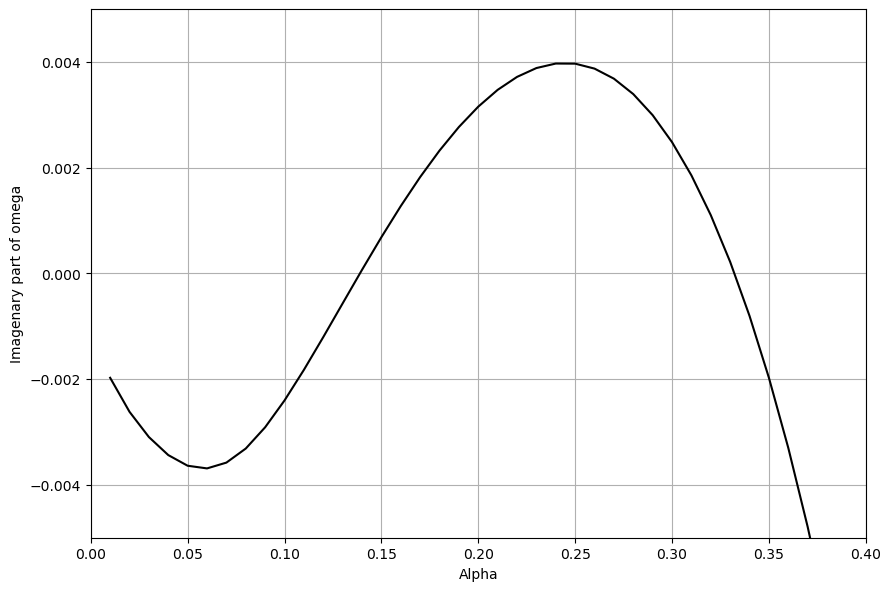

In [98]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7), dpi=100)
plt.plot(alp,iw,'k')
plt.xlim([0,0.4])
plt.ylim([-0.005,0.005])
plt.xlabel('Alpha')
plt.ylabel('Imagenary part of omega')
plt.grid()
plt.show()

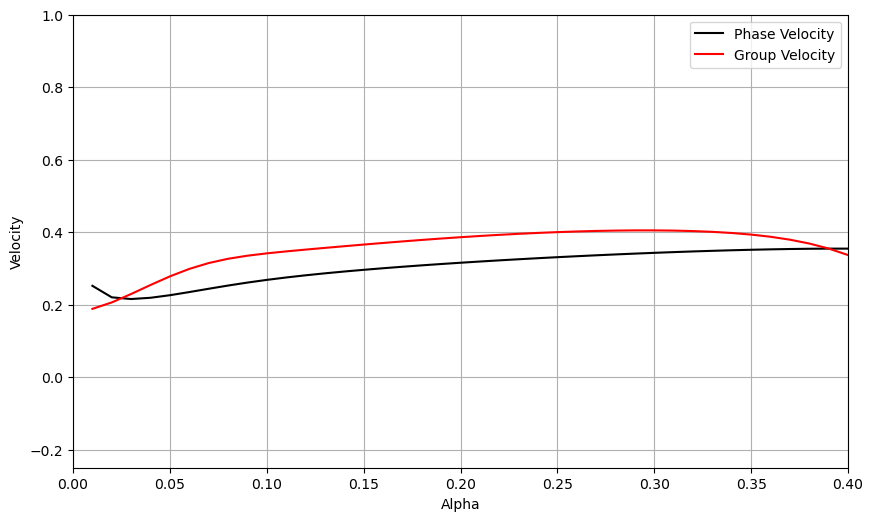

In [101]:
rw = []
for i in range(len(w)):
    c = w[i]
    c = c.real
    rw.append(c)
cph = rw/alp
cg = []
for i in range(len(w)-1):
    q = (rw[i+1]-rw[i])/(alp[i+1]-alp[i])
    cg.append(q)
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=100)
plt.plot(alp,cph,'k',label='Phase Velocity')
plt.xlim([0,0.4])
plt.ylim([0.15,0.4])
plt.xlabel('Alpha')
plt.ylabel('Velocity')
cg.append(0)
plt.plot(alp,cg,'r',label='Group Velocity')
plt.xlim([0,0.4])
plt.ylim([-0.25,1])
plt.xlabel('Alpha')
plt.ylabel('Velocity')
plt.legend()
plt.grid()
plt.show()

In [31]:
def cheb_matrix(n):
    y=np.zeros(n)
    nm=n-1
    for i in range(n):
        y[i]=np.cos(np.pi*i/nm)              
    d=np.zeros((n,n))
    d[0,0]=(1.0+2.0*nm*nm)/6.0;
    d[0,-1]=(-1.0)**nm/(y[0]-y[-1]);
    d[-1,0]=(-1.0)**nm/(y[-1]-y[0]);
    d[-1,-1]=-(1.0+2.0*nm*nm)/6.0;
    for i in range(1,nm):
        d[i,0]=(-1.0)**i/(2.0*(y[i]-y[0]));
        d[i,-1]=(-1.0)**(i+nm)/(2.0*(y[i]-y[-1]))
    for j in range(1,nm):
        d[0,j]=(-1.0)**j*2.0/(y[0]-y[j])
        d[-1,j]=(-1.0)**(j+nm)*2.0/(y[-1]-y[j])
    for i in range(1,nm):
        for j in range(1,nm):
            if i==j:
                d[i,i]=-y[i]/(2.0*(1.0-y[i]**2))
            else:
                d[i,j]=(-1.0)**(i+j)/(y[i]-y[j])
    return y,d
#
# Initialise 
n=80
eta,d1p=cheb_matrix(n)
d2p=np.matmul(d1p,d1p)
d3p=np.matmul(d2p,d1p)
d4p=np.matmul(d2p,d2p)
L=30 # mapping parqameter
eta[0]=1.0-1.0e-6
y=L*(1.0+eta)/(1.0-eta)
#print(y)
eta1=(-((y-L)/(L+y)**2)+1.0/(L+y))
eta2=(2.0*(y-L)/(L+y)**3-2.0/(L+y)**2)
eta3=(-6.0*(y-L)/(L+y)**4+6.0/(L+y)**3)
eta4=(24.0*(y-L)/(L+y)**5-24.0/(L+y)**4)

d1=np.zeros((n,n))
d2=np.zeros((n,n))
d3=np.zeros((n,n))
d4=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        d4[i,j]=eta1[i]**4*d4p[i,j]+6.0*eta1[i]**2*eta2[i]*d3p[i,j]+(3.0*eta2[i]**2+4.0*eta1[i]*eta3[i])*d2p[i,j]+eta4[i]*d1p[i,j]
        d3[i,j]=eta1[i]**3*d3p[i,j]+3.0*eta1[i]*eta2[i]*d2p[i,j]+eta3[i]*d1p[i,j]
        d2[i,j]=eta1[i]**2*d2p[i,j]+eta2[i]*d1p[i,j]
        d1[i,j]=eta1[i]*d1p[i,j]  
#
# Set the velocity profile for Blasius flow
def blas(eta,f): # define the Blasius equation
    blas=(f[1],f[2],-f[0]*f[2])
    return blas

f0=(0.0,0.0,0.4696) # wall condition (adjust f0(2) until u=1 in freestream)
etamax=6.0 # how far to integrate out to
nplot=101 
outrange=np.zeros(nplot)
for i in range(nplot):
    outrange[i]=i*etamax/(nplot-1) # should be a quicker way of doing this

# shoot out from wall to freestream (NB tolerances reduced below default values)
p=integrate.solve_ivp(blas,[0,etamax],f0,t_eval=outrange,rtol=1.e-6,atol=1.e-8)

etab=p.t
ub=p.y[1,:]
#print('\nu freestream= ',ub[-1])
dref=etab[-1]-p.y[0,-1]
#print('\n dref= ',dref)
#plt.plot(etab,ub) # velocity profile

# spline fit from ub, etab/dref to u,y
tck=interpolate.splrep(etab/dref,ub,s=0)
ymax=etamax/dref
u=np.zeros(n)
for i in range(n):
    if y[i] < ymax:
        u[i]=interpolate.splev(y[i],tck,der=0)
    else:
        u[i]=1.0

#print(y)
#print(u)
#plt.plot(y,u)
#plt.xlim([0, 5])
#plt.ylim([0,1.05])

#d1u=np.matmul(d1,u)
d2u=np.matmul(d2,u)

iw = []
w = []
# set flow parameters
for i in range(1,5010,10):
    re=i
    alpha=0.31

    A=np.zeros((n,n),dtype=complex)
    B=np.zeros((n,n),dtype=complex)
    for i in range(n):
        for j in range(n):
            A[i,j]=(u[i]-2.0j*alpha/re)*d2[i,j]+1.0j/(re*alpha)*d4[i,j]
            B[i,j]=d2[i,j]
            if i==j:
                A[i,j]=A[i,j]+1.0j*alpha**3/re-u[i]*alpha**2-d2u[i]
                B[i,j]=B[i,j]-alpha**2

    # now the boundary condition
    for j in range(n):
        A[0,j]=0.0
        A[1,j]=0.0
        A[n-2,j]=0.0
        A[n-1,j]=0.0
        B[0,j]=0.0
        B[1,j]=d1[-1,j]
        B[-2,j]=d1[0,j]
        B[-1,j]=0.0
    B[0,0]=1.0
    B[n-1,n-1]=1.0

    Binv=np.linalg.inv(B)
    eigvals,eigvects=np.linalg.eig(np.matmul(Binv,A))

    # alternative from scip, but no eigenvectors
    #from scipy import linalg
    #eigvals=linalg.eigvals(A,B)
    #print('\neigenvalues= ',eigvals)

    # find largest eigenvalue for 0.01<c_ph<0.99
    eval=np.complex(0.0,-1.e10)
    for i in range(n):
        if np.real(eigvals[i]) > 0.01:
            if np.real(eigvals[i]) < 0.99:
                if np.imag(eigvals[i])>np.imag(eval):
                    eval=eigvals[i]
    #print('\nLargest eigenvalue= ',eval*alpha)  # Gaster test case: 0.06312288+i0.00315665
    c=eval*alpha
    w.append(c)
    s = c.imag
    iw.append(s)
Re = np.linspace(1,5001,501)

for i in range(len(Re)):
    print('Re=',Re[i],'Imag of w=',iw[i])

C:\Users\Mac Pro\AppData\Local\Temp\ipykernel_11640\196126647.py:132: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eval=np.complex(0.0,-1.e10)


Re= 1.0 Imag of w= -0.16184409508154513
Re= 11.0 Imag of w= -0.07117864599197479
Re= 21.0 Imag of w= -0.07603441732404617
Re= 31.0 Imag of w= -0.05271901110398417
Re= 41.0 Imag of w= -0.05587504228548668
Re= 51.0 Imag of w= -0.04895643596181713
Re= 61.0 Imag of w= -0.042381966365879896
Re= 71.0 Imag of w= -0.03725074560997296
Re= 81.0 Imag of w= -0.033107400754898916
Re= 91.0 Imag of w= -0.029675397878230664
Re= 101.0 Imag of w= -0.026776137631729844
Re= 111.0 Imag of w= -0.024288483709954792
Re= 121.0 Imag of w= -0.022126937320016856
Re= 131.0 Imag of w= -0.020229134592508115
Re= 141.0 Imag of w= -0.018548317907319044
Re= 151.0 Imag of w= -0.017048606976253624
Re= 161.0 Imag of w= -0.01570191879425379
Re= 171.0 Imag of w= -0.014485897171250012
Re= 181.0 Imag of w= -0.013382481800182833
Re= 191.0 Imag of w= -0.0123768948439499
Re= 201.0 Imag of w= -0.01145690752908522
Re= 211.0 Imag of w= -0.010612299110894162
Re= 221.0 Imag of w= -0.009834450891797323
Re= 231.0 Imag of w= -0.009116036

Re= 4651.0 Imag of w= -0.005137825492489094
Re= 4661.0 Imag of w= -0.0051265403389771464
Re= 4671.0 Imag of w= -0.0051153049914908185
Re= 4681.0 Imag of w= -0.0051041191204553886
Re= 4691.0 Imag of w= -0.005092982399183742
Re= 4701.0 Imag of w= -0.005081894503842648
Re= 4711.0 Imag of w= -0.0050708551134190935
Re= 4721.0 Imag of w= -0.005059863909697271
Re= 4731.0 Imag of w= -0.005048920577222016
Re= 4741.0 Imag of w= -0.005038024803272179
Re= 4751.0 Imag of w= -0.005027176277831585
Re= 4761.0 Imag of w= -0.005016374693561768
Re= 4771.0 Imag of w= -0.005005619745771081
Re= 4781.0 Imag of w= -0.0049949111323860755
Re= 4791.0 Imag of w= -0.004984248553926523
Re= 4801.0 Imag of w= -0.004973631713476334
Re= 4811.0 Imag of w= -0.00496306031665697
Re= 4821.0 Imag of w= -0.004952534071601738
Re= 4831.0 Imag of w= -0.004942052688927596
Re= 4841.0 Imag of w= -0.004931615881711747
Re= 4851.0 Imag of w= -0.004921223365460917
Re= 4861.0 Imag of w= -0.0049108748580916975
Re= 4871.0 Imag of w= -0.00

alpha = 0.1

Re= 3211.0 Imag of w= -5.133081424485664e-06

Re= 3221.0 Imag of w= 2.7702244396754207e-06

alpha = 0.15

Re= 1281.0 Imag of w= -1.1924960724447247e-07

Re= 1291.0 Imag of w= 3.5690959805861856e-05

alpha = 0.2

Re= 761.0 Imag of w= -7.563374807426768e-05

Re= 771.0 Imag of w= 9.142648848288364e-06

alpha = 0.25

Re= 571.0 Imag of w= -0.00011774859384556368

Re= 581.0 Imag of w= 1.4129354809099237e-05

alpha = 0.3

Re= 511.0 Imag of w= -0.00011823026661188787

Re= 521.0 Imag of w= 2.2067819344185622e-05

alpha = 0.35

Re= 621.0 Imag of w= -7.6004704872660925e-06

Re= 631.0 Imag of w= 3.911737498214354e-05

alpha = 0.4

NA all values of imagenary part of omega are negative. Therefore the alpha value of 0.3 to 0.35 is where the critical Re lies.

alpha = 0.34

Re= 561.0 Imag of w= -4.687653486585706e-05

Re= 571.0 Imag of w= 3.4732199015020906e-05

alpha = 0.33

Re= 531.0 Imag of w= -9.750191699107667e-05

Re= 541.0 Imag of w= 8.730695532716399e-06

alpha = 0.32

Re= 521.0 Imag of w= -6.382635562086107e-05

Re= 531.0 Imag of w= 5.6279243204995986e-05

alpha = 0.31

Re= 511.0 Imag of w= -0.00012093418047384548

Re= 521.0 Imag of w= 1.2714461911917633e-05

The critical Re is 515 and it occurs at alpha = 0.3 to 0.31